In [35]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create element tree object
tree = ET.parse('apple_health_export/export.xml')

In [3]:
# for every health record, extract the attributes into a dictionary (columns). Then create a list (rows).
root = tree.getroot()
record_list = [x.attrib for x in root.iter('Record')]

In [4]:
# create DataFrame from a list (rows) of dictionaries (columns)
data = pd.DataFrame(record_list)
#print(data)

In [5]:
# proper type to dates
for col in ['creationDate', 'startDate', 'endDate']:
    data[col] = pd.to_datetime(data[col])
#print(data)

In [6]:
# value is numeric, NaN if fails
data['value'] = pd.to_numeric(data['value'], errors='coerce')

In [7]:
# some records do not measure anything, just count occurences
# filling with 1.0 (= one time) makes it easier to aggregate
data['value'] = data['value'].fillna(1.0)

In [8]:
# shorter observation names: use vectorized replace function
data['type'] = data['type'].str.replace('HKQuantityTypeIdentifier', '')
data['type'] = data['type'].str.replace('HKCategoryTypeIdentifier', '')

In [9]:
# What data looks like

# rows x columns
print(data.shape)
# all column names
print(data.columns)
# all data types
print(data.type.unique())

(279088, 9)
Index(['type', 'sourceName', 'sourceVersion', 'unit', 'creationDate',
       'startDate', 'endDate', 'value', 'device'],
      dtype='object')
['DietaryWater' 'Height' 'BodyMass' 'HeartRate' 'RespiratoryRate'
 'StepCount' 'DistanceWalkingRunning' 'BasalEnergyBurned'
 'ActiveEnergyBurned' 'FlightsClimbed' 'AppleExerciseTime'
 'RestingHeartRate' 'WalkingHeartRateAverage' 'EnvironmentalAudioExposure'
 'HeadphoneAudioExposure' 'WalkingDoubleSupportPercentage'
 'AppleStandTime' 'WalkingSpeed' 'WalkingStepLength'
 'WalkingAsymmetryPercentage' 'StairAscentSpeed' 'StairDescentSpeed'
 'HKDataTypeSleepDurationGoal' 'AppleWalkingSteadiness'
 'AppleSleepingWristTemperature' 'TimeInDaylight' 'PhysicalEffort'
 'SleepAnalysis' 'AppleStandHour' 'AudioExposureEvent'
 'HeartRateVariabilitySDNN']


In [17]:
# pivot and resample
# body mass and total walking distance
pivot_df = data.pivot_table(index='endDate', columns='type', values='value')
#df = pivot_df.resample('ME').agg({'BodyMass' : "mean", 'DistanceWalkingRunning' : "sum"})
df = pivot_df.resample('D').agg({'HeartRate' : "mean"})
print(df)

type                       HeartRate
endDate                             
2015-03-02 00:00:00-06:00        NaN
2015-03-03 00:00:00-06:00        NaN
2015-03-04 00:00:00-06:00        NaN
2015-03-05 00:00:00-06:00        NaN
2015-03-06 00:00:00-06:00        NaN
...                              ...
2024-12-22 00:00:00-06:00  99.818849
2024-12-23 00:00:00-06:00  91.847156
2024-12-24 00:00:00-06:00  88.043136
2024-12-25 00:00:00-06:00  74.005484
2024-12-26 00:00:00-06:00  71.705472

[3588 rows x 1 columns]


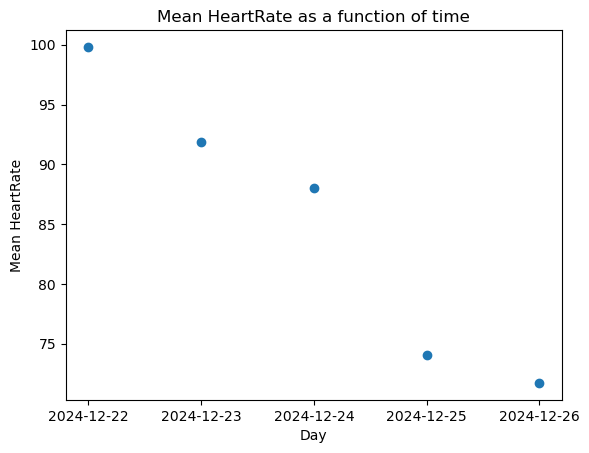

In [59]:
# set data
x = df.index
y = df['HeartRate']

# configure scatterplot
plt.scatter(x, y)

# rename x-axis data labels
labels = df.dropna().index    # drop rows with NaN
labels = [str(date).split(' ')[0] for date in labels]
plt.xticks(df.dropna().index, labels)

# set x and y-axis labels
plt.xlabel('Day')
plt.ylabel('Mean HeartRate')
plt.title('Mean HeartRate as a function of time')
plt.show()
#plt.savefig("Mean HeartRate")    # to save, comment out plt.show()